# Data Validation

In [1]:
# Read in GI01SUMO-00002 start and end CTD files
# CTD cast AT30-013 from Irminger 2 cruise

# CTD cast AR0701-010 from Irminger 3 cruise


# Download data via M2M

In [24]:
# First, import the Python libraries we will need
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from seabird.cnv import fCNV

import warnings
warnings.filterwarnings('ignore')

In [11]:
#---------------Time Processing Routine-------------------------

ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
   return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)


In [12]:
# API Information
USERNAME =''  # need to enter
TOKEN= ''  # need to enter
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

In [33]:
# Instrument Information
siteA = 'GI03FLMA' #Flanking mooring A site
nodeAB = 'RIM01' #FLMA/B Riser
method = 'recovered_inst' #recovered instrument data
streamMO = 'ctdmo_ghqr_instrument_recovered' #CTDMO

#FLMA Deployment 2:
paramsFLMA = {
  'beginDT':'2015-08-19T22:00:00.000Z',
  'endDT':'2015-08-20T00:00:00.000Z',
  'limit':20000,
}

#FLMA
i=40
data_request_url_FLMA=[] # initialize empty array
while i<52:
    if i<49:
        instrument='02-CTDMOG0'+str(i)
        data_request_url_FLMA.append('/'.join((SENSOR_BASE_URL,siteA,nodeAB,instrument,method,streamMO)))
        i += 1
    else:
        instrument='02-CTDMOH0'+str(i)
        data_request_url_FLMA.append('/'.join((SENSOR_BASE_URL,siteA,nodeAB,instrument,method,streamMO)))
        i += 1
print(data_request_url_FLMA)

# https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG040/metadata

['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG040/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG041/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG042/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG043/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG044/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG045/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG046/recovered_inst/ctdmo_ghqr_instrument_recovered', 'https://ooi

In [35]:
# Grab the data
dataFLMA=[]
i=0
for x in data_request_url_FLMA:
    r=requests.get(data_request_url_FLMA[i], params=paramsFLMA, auth=(USERNAME, TOKEN))
    dataFLMA.append(r.json())
    i+=1

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ooinet.oceanobservatories.org:443
DEBUG:urllib3.connectionpool:https://ooinet.oceanobservatories.org:443 "GET /api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG040/recovered_inst/ctdmo_ghqr_instrument_recovered?beginDT=2015-08-19T22%3A00%3A00.000Z&endDT=2015-08-20T00%3A00%3A00.000Z&limit=20000 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ooinet.oceanobservatories.org:443
DEBUG:urllib3.connectionpool:https://ooinet.oceanobservatories.org:443 "GET /api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG041/recovered_inst/ctdmo_ghqr_instrument_recovered?beginDT=2015-08-19T22%3A00%3A00.000Z&endDT=2015-08-20T00%3A00%3A00.000Z&limit=20000 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ooinet.oceanobservatories.org:443
DEBUG:urllib3.connectionpool:https://ooinet.oceanobservatories.org:443 "GET /api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG042/recovered_inst/c

In [36]:
#---------------------Process the data-----------------------

time = []
pressure = []
temperature = []
salinity = []
for x in range(len(dataFLMA)):
    for xx in range(len(dataFLMA[0])):
        time.append(ntp_seconds_to_datetime(dataFLMA[x][xx]['time']))
        pressure.append(dataFLMA[x][xx]['ctdmo_seawater_pressure'])
        temperature.append(dataFLMA[x][xx]['ctdmo_seawater_temperature'])
        salinity.append(dataFLMA[x][xx]['practical_salinity'])

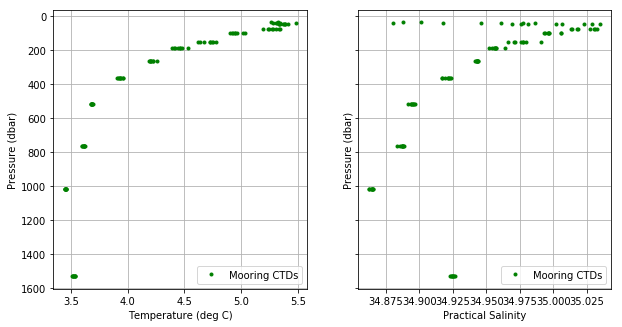

In [79]:
#-------------------Plot the data-----------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.plot(temperature, pressure, 'g.', label='Mooring CTDs')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (deg C)')
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc='lower right')

ax2.plot(salinity, pressure, 'g.', label='Mooring CTDs')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_xlabel('Practical Salinity')
ax2.grid()
ax2.legend(loc='lower right')

# fig.suptitle('{} vs. Shipboard CTD'.format(refdes), fontsize=10)
#fig.suptitle(CTD_cast_name)
fig.subplots_adjust(top=0.9)
plt.show()

# Download Shipboard CTD Data

In [20]:
CTD_cast_name1 = 'at30_010'
CTD_cast_name2 = 'at30_011'
CTD_cast_name3 = 'at30_013'

CTD_file1 = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/c186cd01-7b75-48d3-b0e9-61b19cab40c9/at30_010_full.asc'
CTD_file2 = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/3011c9b0-ce0e-4a1b-bb2e-1b4522903880/at30_011_full.asc'
CTD_file3 = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/810ce28c-feb4-4b35-85de-8197fafc030f/at30_013_full.asc'

# Read in the data file without headers due to a bug in the file (two of the header names run together)
CTD_data1 = pd.read_table(CTD_file1, delim_whitespace=True, header=None)
#CTD_data2 = pd.read_table(CTD_file2, delim_whitespace=True, header=None)
#CTD_data3 = pd.read_table(CTD_file3, delim_whitespace=True, header=None)

# Add back the necessary headers
CTD_data = CTD_data1.rename(columns={4:'Pressure', 5:'Temperature', 28:'Salinity'})
# CTD_data = CTD_data2.rename(columns={4:'Pressure', 5:'Temperature', 28:'Salinity'})
# CTD_data = CTD_data3.rename(columns={4:'Pressure', 5:'Temperature', 28:'Salinity'})

CTD_cast_name = CTD_cast_name1

CTD_data.head()



,0,1,2,3,Pressure,Temperature,6,7,8,9,...,26,27,Salinity,29,30,31,32,33,34,35
0,-2.754,-39.88063,59.76186,2.0,2.019,8.3474,8.3478,3.639185,3.639169,92.7649,...,1027.1091,1027.1088,34.8458,34.8453,1483.62,1483.62,6.56516,0.153,0.0003,0.0
1,17.507,-39.88058,59.76184,3.0,3.029,8.3456,8.3464,3.639063,3.639088,92.7620,...,1027.1140,1027.1135,34.8458,34.8453,1483.63,1483.63,6.57307,0.093,0.0007,0.0
2,30.594,-39.88058,59.76184,4.0,4.038,8.3471,8.3473,3.639240,3.639225,92.7873,...,1027.1184,1027.1182,34.8458,34.8454,1483.65,1483.65,6.57782,0.277,0.0002,0.0
3,33.006,-39.88056,59.76185,5.0,5.048,8.3498,8.3489,3.639542,3.639416,92.8015,...,1027.1227,1027.1224,34.8458,34.8454,1483.68,1483.68,6.57183,0.160,-0.0009,0.0
4,37.520,-39.88055,59.76185,6.0,6.057,8.3492,8.3496,3.639540,3.639533,92.8086,...,1027.1273,1027.1270,34.8458,34.8454,1483.70,1483.70,6.57168,0.175,0.0003,0.0


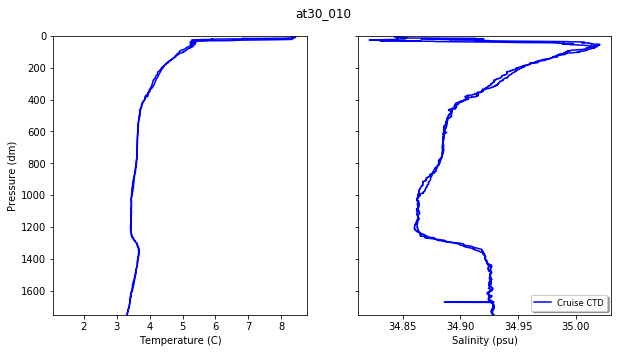

In [78]:
# Now let's plot the Cruise CTD data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ax1.plot(CTD_data.Temperature,CTD_data.Pressure,'b')
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (dm)')
ax1.invert_yaxis()
ax1.set_ylim(1750,0)

ax2.plot(CTD_data.Salinity,CTD_data.Pressure,'b',label='Cruise CTD')
ax2.set_xlabel('Salinity (psu)')

fig.suptitle(CTD_cast_name)
fig.subplots_adjust(top=0.9)

legend = ax2.legend(loc='lower right', shadow=True, fontsize='small');

In [25]:
# From the DATA TEAM notebooks
# We will use a package that was written to work with Sea-Bird *.cnv files called seabird. The function to open the 
# *.cnv file is fCNV(<file>). Per the author: 'this is not an official package, so if you have trouble with it, 
# do not complain to Sea-Bird.'
# https://github.com/castelao/seabird

#f = '/Users/Sheri/Oceanography/OOI/GitHub/ohw2018_Data_Validation/data/AT30_cruise/at30_010.cnv' # change this filepath
f = './data/AT30_cruise/at30_010.cnv'
ctddata = fCNV(f)
ctddata.attributes # list the attributes from the file

DEBUG:root:Openning file: ./data/AT30_cruise/at30_010.cnv


{'sbe_model': '9',
 'LATITUDE': 59.761833333333335,
 'LONGITUDE': -39.88066666666667,
 'gps_datetime': 'Aug 19 2015  21:15:33',
 'seasave': 'V 7.21f',
 'instrument_type': 'CTD',
 'nquan': '36',
 'nvalues': '5374',
 'start_time': 'Aug 19 2015 21:15:33 [NMEA time, header]',
 'bad_flag': '-9.990e-29',
 'file_type': 'ascii',
 'md5': '17c273ec7cc23566961e1d000fb37549',
 'datetime': datetime.datetime(2015, 8, 19, 21, 15, 33),
 'filename': 'at30_010.cnv'}

In [26]:
ctddata.keys() # list the variables in the .cnv file

['timeS',
 'LONGITUDE',
 'LATITUDE',
 'DEPTH',
 'PRES',
 'TEMP',
 'TEMP2',
 'CNDC',
 'CNDC2',
 'CStarTr0',
 'flECO-AFL',
 'oxigenvoltage',
 'altM',
 'nbf',
 'density',
 'density',
 'PSAL',
 'PSAL2',
 'soundspeed',
 'svCM1',
 'timeS',
 'oxigen_ml_L',
 'sbeox0PS',
 'descentrate',
 'T2-T190C',
 'DEPTH',
 'density',
 'density',
 'PSAL',
 'PSAL2',
 'soundspeed',
 'svCM1',
 'oxigen_ml_L',
 'descentrate',
 'T2-T190C',
 'flag']

In [27]:
# Select the data from the shipboard CTD file that you would like to plot. In this example, we will select pressure
# and temperature to create a profile plot.

ctd_cast_pres = ctddata['PRES'].data
ctd_cast_temp = ctddata['TEMP'].data
ctd_cast_sal = ctddata['PSAL'].data

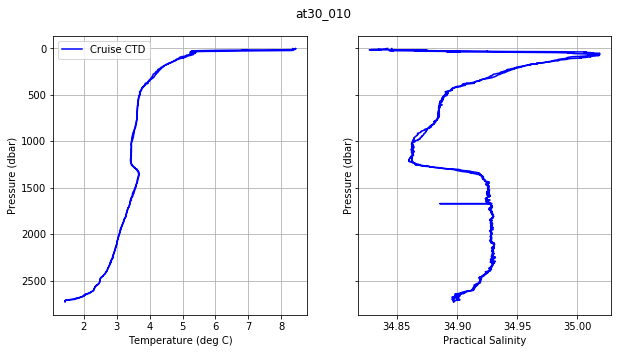

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.plot(ctd_cast_temp, ctd_cast_pres, 'b', label='Cruise CTD')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (deg C)')
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc='best')

ax2.plot(ctd_cast_sal, ctd_cast_pres, 'b')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_xlabel('Practical Salinity')
ax2.grid()

# fig.suptitle('{} vs. Shipboard CTD'.format(refdes), fontsize=10)
fig.suptitle(CTD_cast_name)
fig.subplots_adjust(top=0.9)
plt.show()

# Water Sampling Data

In [29]:
# Change this location for different CTD Cast water sample data
#ws_file_1 = '/Users/Sheri/Oceanography/OOI/GitHub/ohw2018_Data_Validation/data/AT30_cruise/at30_010_sample_data.csv' # change this filepath
ws_file_1 = './data/AT30_cruise/at30_010_sample_data.csv'

ws_data = pd.read_csv(ws_file_1, usecols=['Pressure', 'Salinity'])
ws_data.head()

,Pressure,Salinity
0,2729.3,34.8977
1,2438.1,34.9284
2,2131.0,34.9315
3,1825.3,34.9307
4,1520.1,34.9311


# Overplot datasets

In [30]:
ws_pres = ws_data.Pressure
ws_sal = ws_data.Salinity

ws_sal.head()

0    34.8977
1    34.9284
2    34.9315
3    34.9307
4    34.9311
Name: Salinity, dtype: float64

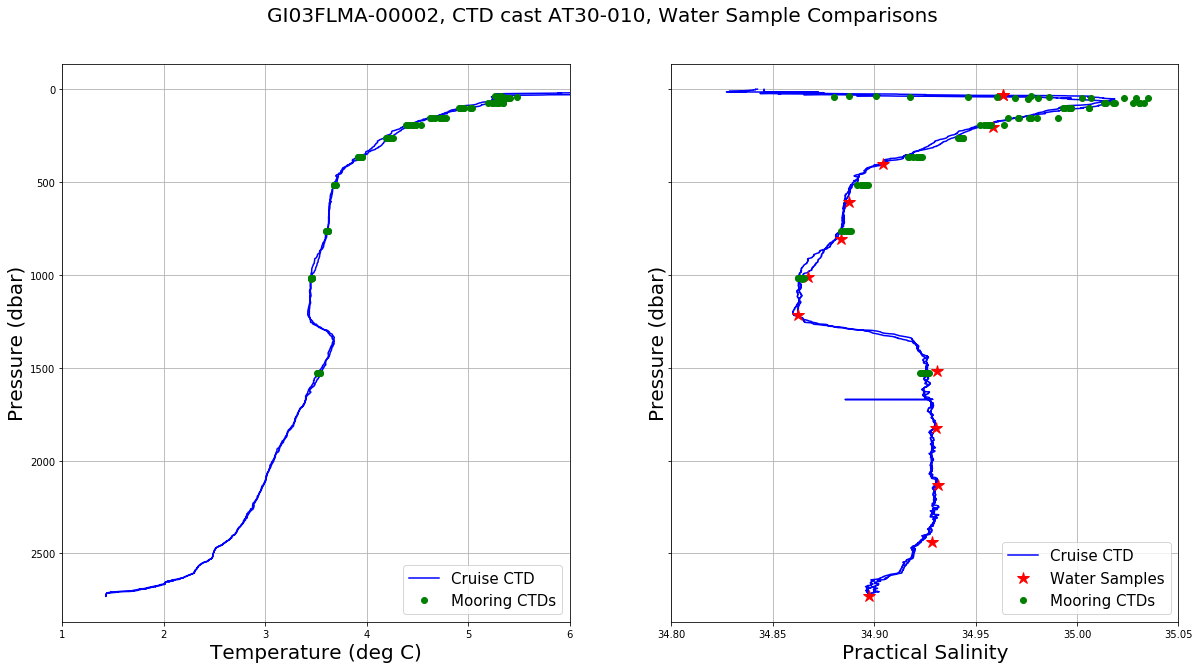

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
#fig, ax1=plt.subplots(figsize=(20,10))
ax1.plot(ctd_cast_temp, ctd_cast_pres, 'b', label='Cruise CTD')
ax1.plot(temperature, pressure, 'g.', label='Mooring CTDs',markersize=12)
ax1.set_ylabel('Pressure (dbar)', fontsize=20)
ax1.set_xlabel('Temperature (deg C)', fontsize=20)
ax1.invert_yaxis()
ax1.set_xlim(1,6)
ax1.grid()
ax1.legend(loc='lower right', fontsize=15)

ax2.plot(ctd_cast_sal, ctd_cast_pres, 'b', label='Cruise CTD')
ax2.plot(ws_sal, ws_pres, 'r*', label='Water Samples',markersize=12)
ax2.plot(salinity, pressure, 'g.', label='Mooring CTDs',markersize=12)
ax2.set_ylabel('Pressure (dbar)', fontsize=20)
ax2.set_xlabel('Practical Salinity', fontsize=20)
ax2.set_xlim(34.8,35.05)
ax2.grid()
ax2.legend(loc='lower right', fontsize=15)

# fig.suptitle('{} vs. Shipboard CTD'.format(refdes), fontsize=10)
fig.suptitle('GI03FLMA-00002, CTD cast AT30-010, Water Sample Comparisons', fontsize=20)
fig.subplots_adjust(top=0.9)
plt.show()

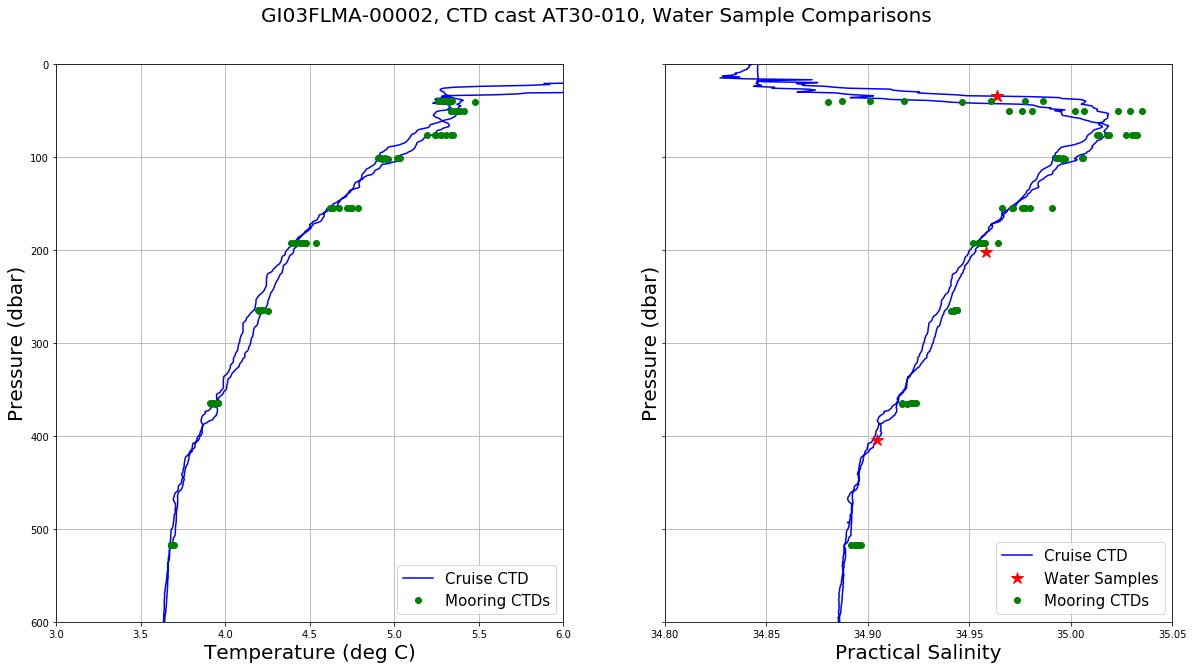

In [70]:
fig, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
#fig, ax1=plt.subplots(figsize=(20,10))
ax3.plot(ctd_cast_temp, ctd_cast_pres, 'b', label='Cruise CTD')
ax3.plot(temperature, pressure, 'g.', label='Mooring CTDs',markersize=12)
ax3.set_ylabel('Pressure (dbar)', fontsize=20)
ax3.set_xlabel('Temperature (deg C)', fontsize=20)
ax3.invert_yaxis()
ax3.set_ylim(600,0)
ax3.set_xlim(3,6)
ax3.grid()
ax3.legend(loc='lower right', fontsize=15)

ax4.plot(ctd_cast_sal, ctd_cast_pres, 'b', label='Cruise CTD')
ax4.plot(ws_sal, ws_pres, 'r*', label='Water Samples',markersize=12)
ax4.plot(salinity, pressure, 'g.', label='Mooring CTDs',markersize=12)
ax4.set_ylabel('Pressure (dbar)', fontsize=20)
ax4.set_xlabel('Practical Salinity', fontsize=20)
ax4.set_xlim(34.8,35.05)
#ax4.set_ylim(0,600)
ax4.grid()
ax4.legend(loc='lower right', fontsize=15)

# fig.suptitle('{} vs. Shipboard CTD'.format(refdes), fontsize=10)
fig.suptitle('GI03FLMA-00002, CTD cast AT30-010, Water Sample Comparisons', fontsize=20)
fig.subplots_adjust(top=0.9)
plt.show()